# Table of contents
```
Github Link:
```
* <a href='#Submission-instructions'>Submission instructions</a>

# Author Information

```
First Name: Max
Last Name: Klevgard
PID: 730127020
Team Name: Machine Learny McMachineLearnyFace
```

## Abstract
I will be performing a few different models - multiple of both univariate ARIMA and multivariate ARIMA - to help predict the future prices of Bitcoin. At the conclusion of this, I will compare the models to each other based on predictive accuracy.


## Univariate ARIMA Model

Here we will implement the univariate autoregressive integrated moving average model. This model is used by fitting previous values of a time series - in this case the bitcoin price - to current values to help better understand the data and predict future prices. The AR part of ARIMA indicates that the changing variable of interest (BTC Price) is regressed on its own lagged values. The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred. The I (for "integrated") indicates that the data values have been replaced with the difference between their values and the previous values. The importance of each of these features to the ARIMA model is so that the model fits the data as best as possible for prediction.

The ARIMA model in this code uses three parameters: p, d, and q. When deciding "d", the amount of differencing needed for the time series data, we use the Augmented Dickey-Fuller (ADF) test. This tests if the data is stationary or non-stationary. Stationary data exhibits a similar mean and variance over time, which is required to perform the ARIMA process. For deciding p and q, we use the PACF and ACF tests respectively to find the optimal lag to use for the model. The p value is the lag window for the actual BTC price, while the q value is the lag window for the error terms.

In [536]:
import numpy as np
import pandas as pd
from pandas import read_excel
#import DatetimeIndex
import sklearn
import random
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf, grangercausalitytests
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [462]:
random.seed(1001)
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
training_data = pd.read_excel("ML_BTC_Training_DATA.xlsx", skiprows=1, parse_dates = [1])
training_data.columns = ['Date','Match Column','BTC Price','BTC in circulation','Market Cap',
                        'Total Trade(USD)','Block Size(MB)','Avg Block Size(MB)','Avg # Of Transactions',
                         'Median Confirmation Time(Min)',
                        'Hash Rate','Difficulty','Mining Revenue($)', 'Transaction Fee(BTC)',
                        'Transaction Fee($)','Cost % of Transaction Volume','Cost per Transaction',
                        'Unique Addresses','Transaction per Day','Total Transaction','Transaction Rate',
                        'Mempool Count','Mempool Growth','Mempool Size','Unspent Transaction',
                        'Transactions Exc First 100','Transactions Exc Long Chains','Transaction Amount (BTC)',
                        'Estimated Transaction Value','Estimated Transaction Value($)','Tether Volume',
                        'ETH Price','ETH Volume','XRP Price','XRP Volume','LTC Price','LTC Volume',
                        'S&P 500','XAU($)']

test_data = pd.read_excel("ML_BTC_Test_DATA.xlsx", skiprows=1, parse_dates = [1])
test_data.columns = ['Date','Match Column','BTC Price','BTC in circulation','Market Cap',
                        'Total Trade(USD)','Block Size(MB)','Avg Block Size(MB)','Avg # Of Transactions',
                         'Median Confirmation Time(Min)',
                        'Hash Rate','Difficulty','Mining Revenue($)', 'Transaction Fee(BTC)',
                        'Transaction Fee($)','Cost % of Transaction Volume','Cost per Transaction',
                        'Unique Addresses','Transaction per Day','Total Transaction','Transaction Rate',
                        'Mempool Count','Mempool Growth','Mempool Size','Unspent Transaction',
                        'Transactions Exc First 100','Transactions Exc Long Chains','Transaction Amount (BTC)',
                        'Estimated Transaction Value','Estimated Transaction Value($)','Tether Volume',
                        'ETH Price','ETH Volume','XRP Price','XRP Volume','LTC Price','LTC Volume',
                        'S&P 500','XAU($)']

In [463]:
data = pd.read_excel("ML_BTC_DATA.xlsx", skiprows=1, parse_dates = [1])
data.columns = ['Date','Match Column','BTC Price','BTC in circulation','Market Cap',
                        'Total Trade(USD)','Block Size(MB)','Avg Block Size(MB)','Avg # Of Transactions',
                         'Median Confirmation Time(Min)',
                        'Hash Rate','Difficulty','Mining Revenue($)', 'Transaction Fee(BTC)',
                        'Transaction Fee($)','Cost % of Transaction Volume','Cost per Transaction',
                        'Unique Addresses','Transaction per Day','Total Transaction','Transaction Rate',
                        'Mempool Count','Mempool Growth','Mempool Size','Unspent Transaction',
                        'Transactions Exc First 100','Transactions Exc Long Chains','Transaction Amount (BTC)',
                        'Estimated Transaction Value','Estimated Transaction Value($)','Tether Volume',
                        'ETH Price','ETH Volume','XRP Price','XRP Volume','LTC Price','LTC Volume',
                        'S&P 500','XAU($)']

In [464]:
btc_vars = ['Date','BTC Price']
date_price_btc = training_data[btc_vars]
date_price_btc_test = test_data[btc_vars]

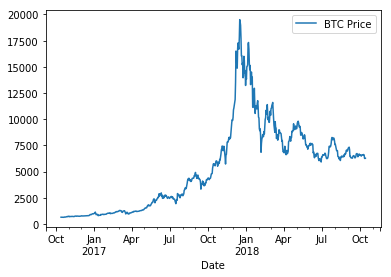

In [465]:
date_price_btc.plot('Date', 'BTC Price')
pyplot.show()

In [466]:
price_btc = training_data['BTC Price']
price_btc_test = test_data['BTC Price']

In [467]:
X = price_btc.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.856464
p-value: 0.352811
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


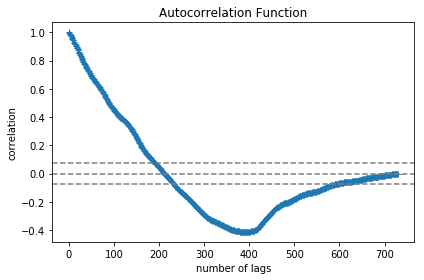

In [515]:
price = training_data['BTC Price']
lag_acf = acf(price, nlags=733)
#Plot PACF:
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(price)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(price)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

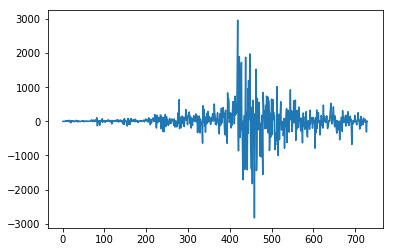

In [469]:
diff1 = price_btc.diff()
training_data['diff_BTCPrice'] = diff1
pyplot.plot(diff1)
pyplot.show()

In [470]:
diff1.pop(0)
X = diff1.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.832922
p-value: 0.000047
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


We now see that the data is stationary after a single difference transformation.

# Using ACF and PACF to determine best ARIMA model

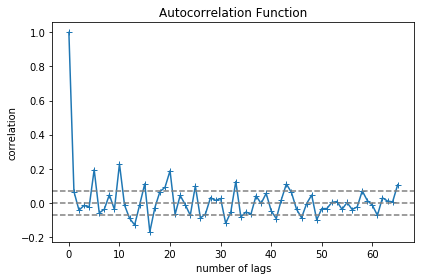

In [502]:
#calling auto correlation function
price = diff1
lag_acf = acf(price, nlags=65)
#Plot PACF:
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(price)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(price)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

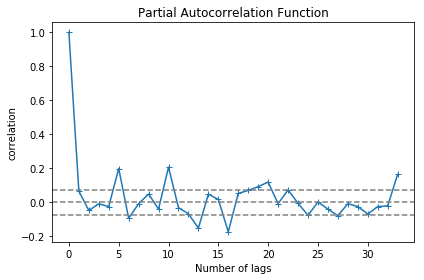

In [499]:
#calling partial correlation function
price = diff1
lag_pacf = pacf(price, nlags=33, method='ols')
#Plot PACF:
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(price)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(price)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

Here, we can see that the best model is simply using 1 for both the AR and MA lags.

In [477]:
model = ARIMA(price_btc, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.BTC Price   No. Observations:                  729
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5341.975
Method:                       css-mle   S.D. of innovations            368.285
Date:                Sun, 01 Dec 2019   AIC                          10691.951
Time:                        15:14:18   BIC                          10710.317
Sample:                             1   HQIC                         10699.037
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.7106     14.321      0.538      0.590     -20.357      35.779
ar.L1.D.BTC Price    -0.6515      0.106     -6.127      0.000      -0.860      -0.443
ma.L1.D.BTC Price     0.

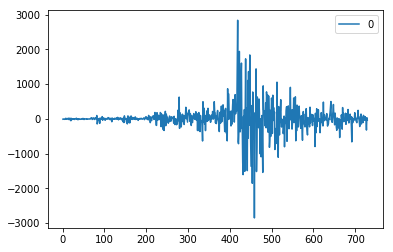

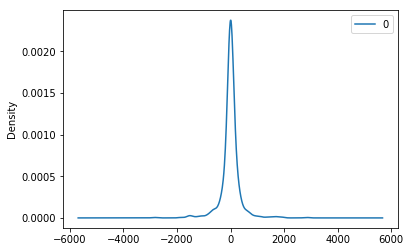

                 0
count   729.000000
mean     -0.012363
std     368.537668
min   -2849.440359
25%     -67.482700
50%       0.298081
75%      81.473341
max    2834.843008


In [478]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Test MSE: 60518.511


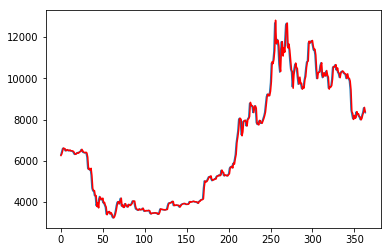

In [524]:
#Creating Predictions using ARIMA Forecasting
history = [x for x in price_btc]
predictions = list()
error_list = list()
for t in range(len(price_btc_test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = price_btc_test[t]
    history.append(obs)
    error_list.append(abs(yhat-obs))
error = mean_squared_error(price_btc_test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(price_btc_test)
pyplot.plot(predictions, color='red')
pyplot.show()

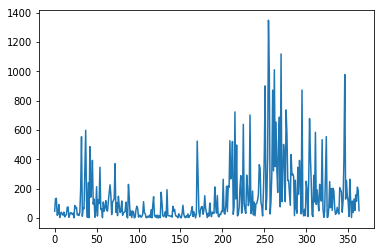

In [480]:
plt.plot(error_list)

In [481]:
#average error
print(sum(error_list)/len(error_list))

[143.2573027]


# Using for loop to find best ARIMA model

In [521]:
def _get_best_model(data):
    best_aic = np.inf 
    best_order = None
    best_mdl = None
    pq_rng = range(5) # [0,1,2,3,4]
    d_rng = range(2) # [0,1]
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = ARIMA(data, order=(i,d,j)).fit()
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl
data = training_data['BTC Price']
results_best = _get_best_model(data)

aic: 10632.04 | order: (4, 1, 4)


/Users/maxklevgard/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Test MSE: 65800.593


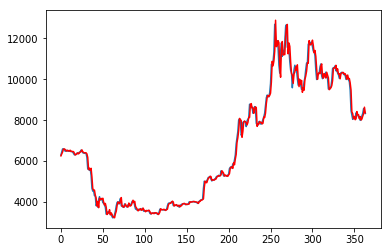

In [522]:
#Creating Predictions using ARIMA Forecasting
history = [x for x in price_btc]
predictions = list()
error_list = list()
for t in range(len(price_btc_test)):
    model = ARIMA(history, order=(4,1,4))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = price_btc_test[t]
    history.append(obs)
    error_list.append(abs(yhat-obs))
error = mean_squared_error(price_btc_test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(price_btc_test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [523]:
#average error
print(sum(error_list)/len(error_list))

[149.48283161]


After running separate models, these results confirm the importance of using the ACF and PACF plots when deciding which model will have the smallest mean squared prediction error. While using lags of 4 for the AR and MA equations work better on the training data, we can see that these lags were below the line of significance in the plots. This result shows how overfitting in the training data can lead to worse performances on the test data. Overall, we have an average prediction error of about $150, which can be a significant amount depending on the amount of capital is being invested in bitcoin.

# Multivariate ARIMA Model

In the multivariate ARIMA model, sometimes called the ARIMAX model, we assume that the time series in question (BTC Price) is affected by another time series occuring simultaneously. To see whether or not another time series has a significant effect on the bitcoin price, we use the Granger Causality test. This test determines whether one time series is useful in forecasting another. In this case, I will examine different time series (such as mining difficulty, S&P 500 index, average # of transactions, etc.) to see if they can help better predict future prices for BTC.

In [482]:
series_list = ['BTC in circulation','Market Cap',
                        'Total Trade(USD)','Block Size(MB)','Avg Block Size(MB)','Avg # Of Transactions',
                         'Median Confirmation Time(Min)',
                        'Hash Rate','Difficulty','Mining Revenue($)', 'Transaction Fee(BTC)',
                        'Transaction Fee($)','Cost % of Transaction Volume','Cost per Transaction',
                        'Unique Addresses','Transaction per Day','Total Transaction','Transaction Rate',
                        'Mempool Count','Mempool Growth','Mempool Size','Unspent Transaction',
                        'Transactions Exc First 100','Transactions Exc Long Chains','Transaction Amount (BTC)',
                        'Estimated Transaction Value','Estimated Transaction Value($)','Tether Volume',
                        'ETH Price','ETH Volume','XRP Price','XRP Volume','LTC Price','LTC Volume',
                        'S&P 500','XAU($)']

We need to make all of the column data stationary, so that we do not get any misleading results from the Granger Causality Test. The following code will make sure that each column is individually differenced the correct amount of times (such that Augmented Dickey Fuller test passes to that 1% significance threshold) so the causality test can be performed properly. The code will result in a list diff_amt that contains the amount of times each column was differenced, and it will also change the training data so that it contains the new differenced data.

In [483]:
diff_amt = list()
i = 0
for s in series_list:
    a = 0
    i = 0
    td = training_data[s]
    td.dropna(inplace = True)
    X = td.values
    while (i == 0):
        td.dropna(inplace = True)
        X = td
        result = adfuller(X)
        if (result[0] < result[4].get("1%")):
            diff_amt.append(a)
            i=1
        else:
            a=a+1
            training_data[s] = training_data[s].diff()
            td = training_data[s]
            X = td.values

In [484]:
for s in series_list:
    print(s)
    model = grangercausalitytests(training_data[['BTC Price',s]].dropna(),1)
    print('\n')

BTC in circulation

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2449  , p=0.0721  , df_denom=725, df_num=1
ssr based chi2 test:   chi2=3.2583  , p=0.0711  , df=1
likelihood ratio test: chi2=3.2510  , p=0.0714  , df=1
parameter F test:         F=3.2449  , p=0.0721  , df_denom=725, df_num=1


Market Cap

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1345  , p=0.0771  , df_denom=725, df_num=1
ssr based chi2 test:   chi2=3.1475  , p=0.0760  , df=1
likelihood ratio test: chi2=3.1407  , p=0.0764  , df=1
parameter F test:         F=3.1345  , p=0.0771  , df_denom=725, df_num=1


Total Trade(USD)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.1655  , p=0.0076  , df_denom=725, df_num=1
ssr based chi2 test:   chi2=7.1952  , p=0.0073  , df=1
likelihood ratio test: chi2=7.1598  , p=0.0075  , df=1
parameter F test:         F=7.1655  , p=0.0076  , df_denom=725, df_num=1


Block Size(MB)

Granger Causality
number 

ssr based F test:         F=0.8276  , p=0.3633  , df_denom=726, df_num=1
ssr based chi2 test:   chi2=0.8310  , p=0.3620  , df=1
likelihood ratio test: chi2=0.8306  , p=0.3621  , df=1
parameter F test:         F=0.8276  , p=0.3633  , df_denom=726, df_num=1


S&P 500

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6825  , p=0.1952  , df_denom=498, df_num=1
ssr based chi2 test:   chi2=1.6926  , p=0.1933  , df=1
likelihood ratio test: chi2=1.6897  , p=0.1936  , df=1
parameter F test:         F=1.6825  , p=0.1952  , df_denom=498, df_num=1


XAU($)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4232  , p=0.1202  , df_denom=515, df_num=1
ssr based chi2 test:   chi2=2.4373  , p=0.1185  , df=1
likelihood ratio test: chi2=2.4316  , p=0.1189  , df=1
parameter F test:         F=2.4232  , p=0.1202  , df_denom=515, df_num=1




Looking through this information from the tests, we can identify that Total Trade (USD), Cost per Transaction, XRP Price, and XRP Volume are the best time series correlations to BTC Price. For the sake of this notebook, I will only run a model on the Total Trade (USD) time series, however another notebook will look at all four of these time series. 

In [485]:
training_data['lag_totalTrade'] = training_data['Total Trade(USD)'].shift()

In [486]:
model1 = SARIMAX(endog=training_data['BTC Price'][2:], exog=training_data[['lag_totalTrade']][2:], order=[1,1,1])
results1 = model1.fit(maxiter=200, method='nm')
print(results1.summary())

Optimization terminated successfully.
         Current function value: 7.307829
         Iterations: 154
         Function evaluations: 258
                           Statespace Model Results                           
Dep. Variable:              BTC Price   No. Observations:                  728
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5320.100
Date:                Sun, 01 Dec 2019   AIC                          10648.199
Time:                        15:21:58   BIC                          10666.555
Sample:                             0   HQIC                         10655.282
                                - 728                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
lag_totalTrade  9.055e-08   1.12e-08      8.091      0.000    

In [487]:
#Create differenced full dataset for Total Trade(USD)
data['Total Trade(USD)'] = data['Total Trade(USD)'].diff()
data['lag_totalTrade'] = data['Total Trade(USD)'].shift()

In [488]:
#Creating Predictions using ARIMA Forecasting
history = [x for x in price_btc]
predictions = list()
error_list = list()
endog = data['BTC Price'][2:]
exog = data[['lag_totalTrade']][2:]
model1 = SARIMAX(endog=endog, exog=exog, order=[1,1,1])
model_fit = model1.fit(maxiter=200, method='nm')
output = model_fit.predict(start=731)
print(output)

Optimization terminated successfully.
         Current function value: 7.210742
         Iterations: 132
         Function evaluations: 234
733      6577.938052
734      6552.809027
735      6600.380244
736      6479.582811
737      6489.178447
738      6532.314769
739      6502.405423
740      6483.717449
741      6507.689000
742      6470.609795
743      6477.137674
744      6461.815820
745      6447.567552
746      6387.395415
747      6300.964485
748      6306.834172
749      6345.052719
750      6392.484263
751      6355.717892
752      6401.921399
753      6437.814295
754      6446.591222
755      6554.358109
756      6462.578238
757      6416.053800
758      6390.691443
759      6381.712157
760      6409.619377
761      6370.628766
762      6166.553911
            ...     
1064    10240.547248
1065    10307.434474
1066    10346.509804
1067    10313.812422
1068    10251.507788
1069    10216.529511
1070    10190.970966
1071     9981.429247
1072    10205.982483
1073    10000.887100

Average Error:
244.31111943812996
Test MSE: 60640.805


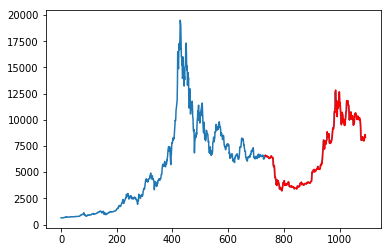

In [489]:
error_list = list()
for i in range(len(output)):
    error_list.append(abs(output.get(733+i) - price_btc_test[i]))
#average error
print("Average Error:")
print(sum(error_list)/len(error_list))
error = mean_squared_error(data['BTC Price'][733:], output)
print('Test MSE: %.3f' % error)
pyplot.plot(data['BTC Price'])
pyplot.plot(output, color='red')
pyplot.show()

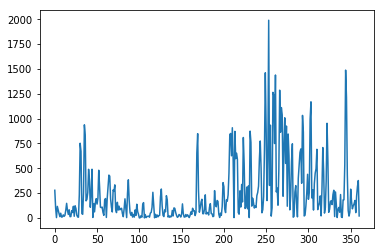

In [490]:
plt.plot(error_list)

We can see that using the Total Trade (USD) time series in the multivariate ARIMA model does not perform as well as the original univariate ARIMA model. This trend also continues with the other three datasets of Cost per Transaction, XRP Price, and XRP Volume. Comparing solely the multivariate ARIMA models, Total Trade (USD) performed the best with a test MSE of 606040.805, followed by Cost per Transaction, XRP Price, then XRP Volume, with test MSEs of 60834.406, 60846.867, and 61540.787 respectively.

Overall, we see that the simple univariate ARIMA model works the best. This result makes sense for a couple of reasons. First, in the multivariate model, it makes sense that variables such as XRP Price and Volume would not be very indicative of bitcoin price considering that it is a much less used cryptocurrency comparatively. If anything, BTC price would probably have a bigger effect on the prices of other, less traded, options like XRP and Litecoin. Secondly, bitcoin prices are still being adopted into society at a slow rate, and the idea that other time series data is indicative of its future price contradicts the belief that BTC is too volatile and unstable to predict. 

In the future, I would like to improve this model by finding time series data on sentiment scores of tweets and news articles about bitcoin. As an online currency, I believe that people's sentiment online about bitcoin could lead to a strong correlation and lead to better predictive accuracy.  